In [72]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt

In [73]:
train = pd.read_csv('E:/New folder (2)/AITS/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('E:/New folder (2)/AITS/house-prices-advanced-regression-techniques/test.csv')

In [74]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [75]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [76]:
train.shape

(1460, 81)

In [77]:
test.shape

(1459, 80)

In [78]:
train.drop('Id',axis=1,inplace=True)

In [79]:
train.shape

(1460, 80)

In [80]:
corelation = train.corr()
corelation_list = corelation['SalePrice'].sort_values(ascending=False)

In [81]:
corelation_list

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [82]:
missing_data_train  = train.isnull().sum().sort_values(ascending=False)
missing_data_test  = test.isnull().sum().sort_values(ascending=False)

In [83]:
missing_data_train.head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

In [84]:
missing_data_test.head(34)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
dtype: int64

In [85]:
null_has_meaning = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]

In [86]:
for i in null_has_meaning:
    train[i].fillna("None", inplace=True)
    test[i].fillna("None", inplace=True)

In [87]:
missing_data_train  = train.isnull().sum().sort_values(ascending=False)
missing_data_test  = test.isnull().sum().sort_values(ascending=False)

In [88]:
missing_data_train.head(6)

LotFrontage    259
GarageYrBlt     81
MasVnrType       8
MasVnrArea       8
Electrical       1
SalePrice        0
dtype: int64

In [89]:
missing_data_test.head(20)

LotFrontage     227
GarageYrBlt      78
MasVnrType       16
MasVnrArea       15
MSZoning          4
Functional        2
BsmtHalfBath      2
BsmtFullBath      2
Utilities         2
BsmtFinSF1        1
Exterior1st       1
Exterior2nd       1
GarageCars        1
GarageArea        1
KitchenQual       1
SaleType          1
TotalBsmtSF       1
BsmtUnfSF         1
BsmtFinSF2        1
ExterQual         0
dtype: int64

In [90]:
most_occuring = ['LotFrontage','GarageYrBlt','MasVnrType','MasVnrArea','Electrical']

In [91]:
for i in most_occuring:
    train[i].fillna(train[i].mode()[0], inplace=True)
    test[i].fillna(test[i].mode()[0], inplace=True)

In [92]:
missing_data_train  = train.isnull().sum().sort_values(ascending=False)
missing_data_test  = test.isnull().sum().sort_values(ascending=False)

In [93]:
missing_data_test.head(16)

MSZoning        4
Functional      2
Utilities       2
BsmtFullBath    2
BsmtHalfBath    2
TotalBsmtSF     1
SaleType        1
GarageArea      1
Exterior1st     1
BsmtUnfSF       1
Exterior2nd     1
KitchenQual     1
GarageCars      1
BsmtFinSF2      1
BsmtFinSF1      1
RoofMatl        0
dtype: int64

In [94]:
remaining = ['MSZoning','Functional','Utilities','BsmtFullBath','BsmtHalfBath','TotalBsmtSF','SaleType','GarageArea','Exterior1st','BsmtUnfSF','Exterior2nd','KitchenQual','GarageCars','BsmtFinSF2','BsmtFinSF1']

In [95]:
for i in remaining:
    test[i].fillna(test[i].mode()[0], inplace=True)

In [96]:
missing_data_train  = train.isnull().sum().sort_values(ascending=False)
missing_data_test  = test.isnull().sum().sort_values(ascending=False)

In [97]:
missing_data_train.head(2)

SalePrice        0
SaleCondition    0
dtype: int64

In [98]:
missing_data_test.head(2)

SaleCondition    0
SaleType         0
dtype: int64

In [99]:
train.shape

(1460, 80)

In [100]:
test.shape

(1459, 80)

In [101]:
test.drop('Id',axis=1,inplace=True)

In [102]:
test.shape

(1459, 79)

In [103]:
categorical_feature_mask = train.dtypes==object

In [104]:
categorical_cols = train.columns[categorical_feature_mask].tolist()

In [105]:
categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [106]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,181500


In [107]:
test.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,...,120,0,None,MnPrv,None,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,Gar2,12500,6,2010,WD,Normal


In [108]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train[categorical_cols] = train[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))
test[categorical_cols] = test[categorical_cols].apply(lambda col: labelencoder.fit_transform(col))

In [109]:
train.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500


In [110]:
test.head(2)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,1,3,3,0,4,...,120,0,2,2,1,0,6,2010,8,4
1,20,3,81.0,14267,1,1,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4


In [111]:
X = train.drop(['SalePrice'],axis=1).values

In [112]:
Y = train['SalePrice'].values

C:\Users\Ram\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


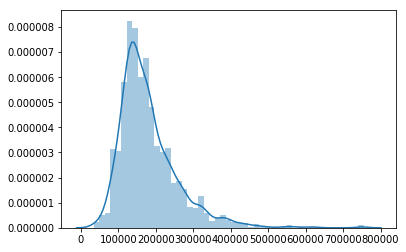

In [113]:
sns.distplot(Y)

C:\Users\Ram\Anaconda4\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


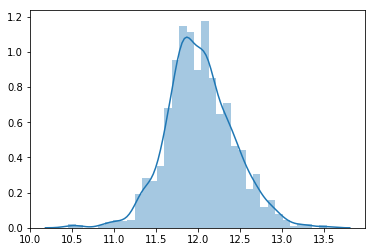

In [115]:
sns.distplot(np.log(Y))

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [118]:
X_train.shape

(1168, 79)

In [119]:
Y_train.shape

(1168,)

In [120]:
X_test.shape

(292, 79)

In [121]:
Y_test.shape

(292,)

In [122]:
Y_train = Y_train.reshape(-1,1)

In [123]:
Y_test = Y_test.reshape(-1,1)

In [124]:
Y_train.shape

(1168, 1)

In [125]:
Y_test.shape

(292, 1)

In [126]:
from sklearn.linear_model import LinearRegression

In [127]:
lr = LinearRegression()

In [128]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [129]:
Y_prediction = lr.predict(X_test)

In [130]:
Y_prediction.shape

(292, 1)

(0, 700000)

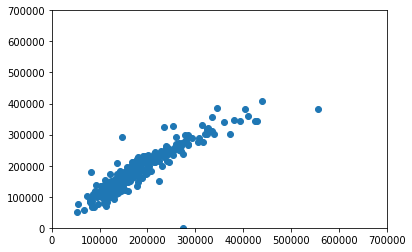

In [131]:
plt.scatter(Y_test,Y_prediction)
plt.xlim(0,700000)
plt.ylim(0,700000)

In [132]:
from sklearn.metrics import r2_score

In [133]:
r2_score(Y_test,Y_prediction)

0.811400917834828

In [136]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [139]:
ridge = Ridge()
parameters_ridge = {"fit_intercept" : [True, False], "normalize" : [True, False], "copy_X" : [True, False], "solver" : ["auto"]}
grid_ridge = GridSearchCV(ridge, parameters_ridge, verbose=1, scoring="r2")
grid_ridge.fit(X_train, Y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'fit_intercept': [True, False], 'normalize': [True, False], 'copy_X': [True, False], 'solver': ['auto']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=1)

In [140]:
ridge = grid_ridge.best_estimator_
ridge.fit(X_train, Y_train)
ridge_pred = ridge.predict(X_test)

In [141]:
r2_score(Y_test,ridge_pred)

0.7731466987131353

(0, 600000)

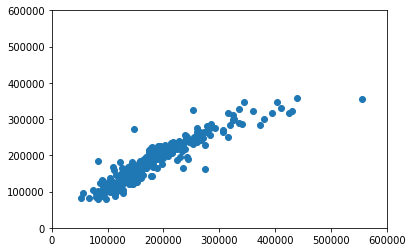

In [144]:
plt.scatter(Y_test,ridge_pred)
plt.xlim(0,600000)
plt.ylim(0,600000)